In [1]:
import pandas as pd
import numpy as np
from glob import glob
from scipy.io import loadmat
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
num_genes_list = [1000]
results_loc = '../results/'

In [3]:
list_of_results = glob(results_loc + '*')

In [4]:
results_all = []
for num_genes in [1000]:
    for fold in range(5):
        for method in ['sparse', 'gnscca']:
            for deflation in ['hd', 'pd', 'opd']:
                curr_file = '_'.join((method, deflation, str(num_genes),
                                      str(fold), 'log_histogram', 'best.mat'))
                loaded_correlation = loadmat(results_loc + curr_file)['test_correlation']
#                 if math.isnan(np.sum(loaded_correlation)):
#                     print(method, deflation, num_genes, fold)
#                 else:
                test_corr = np.sum(((loaded_correlation)))
                results_all.append([method, deflation, num_genes, fold, 'log_histogram', test_corr])

In [5]:
results_df = pd.DataFrame(results_all,
                          columns =['method', 'deflation', 'num_genes', 'fold', 'feature', 'test_corr']) 


In [6]:
methods_all = ['sparse', 'gnscca']
methods_dict = {'cca': 'CCA', 
                'sparse': 'SCCA', 
                'gnscca': 'GN-SCCA', 
                'gcca': 'GN-SCCA-PG'}

deflation_all = ['hd', 'pd', 'opd']
mapping_methods = {'scca':'K-SCCA \t\t',
                   'gcca_no_prior':'K-GCCA \t',
                   'gcca_prior': 'K-GCCA-Prior \t'}
 
# num_genes_all = [500, 800, 1000, 3000]
# folds = [0,1,2,3,4]
curr_gene = 1000

print('Method \t\t&' + '\t\t & '.join(deflation_all))

for curr_method in methods_all:
    curr_row = [methods_dict[curr_method]]
    for curr_deflation in deflation_all:
        temp_df = results_df[results_df['method'] == curr_method]
        temp_df = temp_df[temp_df['num_genes'] == curr_gene]
        temp_df = temp_df[temp_df['deflation'] == curr_deflation]
        temp_mean = temp_df.mean()['test_corr']
        temp_std = temp_df.std()['test_corr']
        curr_row.append('{0:.2f}'.format(temp_mean) +  ' $\pm$ ' + '{0:.2f}'.format(temp_std))
    print('\t & '.join(curr_row) + ' \\\\' )

Method 		&hd		 & pd		 & opd
SCCA	 & 7.60 $\pm$ 1.53	 & 9.52 $\pm$ 0.65	 & 10.92 $\pm$ 0.75 \\
GN-SCCA	 & nan $\pm$ nan	 & 9.38 $\pm$ 0.61	 & 9.43 $\pm$ 0.35 \\


/var/folders/tz/tydlmhwd31g7sc3jfdstbc0h0000gp/T/ipykernel_24782/2456813523.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_mean = temp_df.mean()['test_corr']
/var/folders/tz/tydlmhwd31g7sc3jfdstbc0h0000gp/T/ipykernel_24782/2456813523.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_std = temp_df.std()['test_corr']


In [7]:
results_single = []
results_cumulative = []
for num_genes in [1000]:
    for fold in range(5):
        for method in ['sparse', 'gnscca']:
#         for method in ['cca', 'sparse', 'gnscca', 'gcca']:
            for deflation in ['hd', 'pd', 'opd']:
                curr_file = '_'.join((method, deflation, str(num_genes),
                                      str(fold), 'log_histogram', 'best.mat'))
                loaded_correlation = loadmat(results_loc + curr_file)['test_correlation']
                if math.isnan(np.sum(loaded_correlation)):
                    print(method, deflation, num_genes, fold)
                else:
                    test_corr_cumulative = np.cumsum(((loadmat(results_loc + curr_file)['test_correlation'])))
                    for j in range(len(test_corr_cumulative)):
                        results_single.append(
                            [method, deflation, num_genes, fold, 'log_histogram', j, loaded_correlation[0][j]])
                        results_cumulative.append(
                            [method, deflation, num_genes, fold, 'log_histogram', j, test_corr_cumulative[j]])

gnscca hd 1000 0
gnscca hd 1000 1
gnscca hd 1000 2
gnscca hd 1000 3
gnscca hd 1000 4


In [8]:
results_single_df = pd.DataFrame(results_single,
                          columns =['method', 'deflation', 'num_genes', 'fold', 'feature', 'itr', 'test_corr']) 
results_cumulative_df = pd.DataFrame(results_cumulative,
                          columns =['method', 'deflation', 'num_genes', 'fold', 'feature', 'itr', 'test_corr_cumulative']) 

/var/folders/tz/tydlmhwd31g7sc3jfdstbc0h0000gp/T/ipykernel_24782/2225897649.py:67: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(list(plot_.items()),     # The line objects


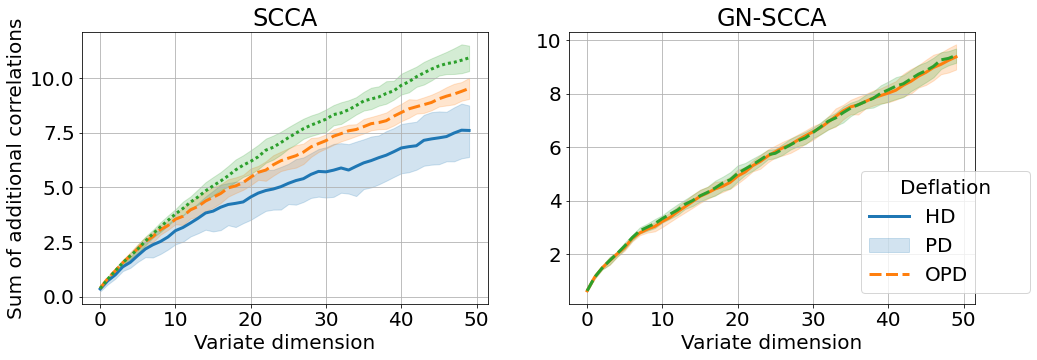

In [9]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex='col')
itr = 0
palette=sns.color_palette(n_colors=3)
palette_idx = 0
simulation_dict = {'basic': 'Original', 'sparse':'Sparse', 'graph': 'Graph'}
plot_={}

methods_all = ['SCCA', 'GN-SCCA']
deflation_all = ['hd', 'pd', 'opd']
deflation_terms = {'hd':'HD', 'pd':'PD', 'opd':'OPD'}

mapping_methods = {'scca':'K-SCCA \t\t',
                   'gcca_no_prior':'K-GCCA \t',
                   'gcca_prior': 'K-GCCA-Prior \t'}

# folds = [0,1,2,3,4]
curr_gene = 1000

itr = 0
for curr_method in ['sparse', 'gnscca']:
# for curr_deflation in deflation_all:
    itr = itr + 1
    curr_axs = axs[(itr-1)%3]
    temp_df = results_cumulative_df
    temp_df = temp_df[temp_df['num_genes'] == curr_gene]
    temp_df = temp_df[temp_df['method'] == curr_method]
#     temp_df = temp_df[temp_df['itr'] < 5]
#     temp_df = temp_df[temp_df['deflation'] == curr_deflation]
    temp_df = temp_df[temp_df['fold'] < 5]

#     print(temp_df)
#     print(temp_df.shape)
    plot_[itr] = sns.lineplot(x="itr", y='test_corr_cumulative',
                 hue='deflation', 
                 style='deflation',
                 linewidth=3,
                 err_style='band',
                 data=temp_df, ax=curr_axs, palette=palette[palette_idx:]) #"colorblind", as_cmap=True))                                                                    ')
    plot_[itr].grid()
    curr_axs.set_ylabel('')
    curr_axs.set_xlabel('Variate dimension')

    curr_axs.grid(which='minor')
#     curr_axs.set_yticks(np.linspace(0, 1.5, 6))

#         print(curr_deflation)
#         print(curr_deflation == 'hd')

    if (itr-1)%3 == 0:
        curr_axs.set_ylabel('Sum of additional correlations')
    if curr_method == 'sparse':
        curr_axs.set_title('SCCA')
    if curr_method == 'gnscca':
        curr_axs.set_title('GN-SCCA')
#     if itr > 6:
#         curr_axs.set_xlabel('Variate dimension')

    curr_axs.legend('', frameon=False)
#     curr_axs.set(yscale='log')
#     curr_axs.set_ylim(0, 10)
    
    line_labels = [deflation_terms[d] for d in deflation_all]
    palette_idx = palette_idx + 1

# Create the legend
fig.legend(list(plot_.items()),     # The line objects
       labels=line_labels,   # Position of legend
       ncol=1,
       borderaxespad=0.1,    # Small spacing around legend box
       title="Deflation" , # Title for the legend
       bbox_to_anchor=(0.8, 0.15, 0.15, .502), 
       loc='lower right',
       mode="expand")


### Results for prediction

In [10]:
survival_results_loc = '../survival_results/'
survival_models_list = sorted(glob(survival_results_loc + '*'))
print(survival_models_list)

['../survival_results/PCAconcat.npz', '../survival_results/PCAgenomics.npz', '../survival_results/PCAimaging.npz', '../survival_results/feature_gnscca_log_histogram_hd.npz', '../survival_results/feature_gnscca_log_histogram_hd_genomics.npz', '../survival_results/feature_gnscca_log_histogram_hd_imaging.npz', '../survival_results/feature_gnscca_log_histogram_opd.npz', '../survival_results/feature_gnscca_log_histogram_opd_genomics.npz', '../survival_results/feature_gnscca_log_histogram_opd_imaging.npz', '../survival_results/feature_gnscca_log_histogram_pd.npz', '../survival_results/feature_gnscca_log_histogram_pd_genomics.npz', '../survival_results/feature_gnscca_log_histogram_pd_imaging.npz', '../survival_results/feature_scca_log_histogram_hd.npz', '../survival_results/feature_scca_log_histogram_hd_genomics.npz', '../survival_results/feature_scca_log_histogram_hd_imaging.npz', '../survival_results/feature_scca_log_histogram_opd.npz', '../survival_results/feature_scca_log_histogram_opd_ge

In [11]:
curr_scores = []
for model in survival_models_list:
    loaded = np.load(model, allow_pickle=True)
    curr_model_type = model.split('/')[-1].split('.')[0]
#     print(curr_model_type)
    if '_' in curr_model_type:
        curr_deflation = curr_model_type.split('_')[4]
        curr_method = curr_model_type.split('_')[1]
        
        if len(curr_model_type.split('_')) == 6:
            curr_feature = curr_model_type.split('_')[5]
        else:
            curr_feature = 'concat'
    else:
        curr_deflation = 'nd'
        curr_method = curr_model_type[:3]
        curr_feature = curr_model_type[3:]
        
    for s in range(5):
        if not loaded['arr_1'][0]:
            continue
        curr_score = [curr_method, curr_feature, curr_deflation, s, len(loaded['arr_1'][0].params_), loaded['arr_0'][s]]
        curr_scores.append(curr_score)

In [12]:
scores_df = pd.DataFrame(curr_scores, columns=['method', 'feature', 'deflation', 'fold', 'dim', 'c-index'])
print(scores_df[scores_df['deflation']=='nd'])

   method   feature deflation  fold  dim   c-index
0     PCA    concat        nd     0  100  0.758235
1     PCA    concat        nd     1  100  0.662706
2     PCA    concat        nd     2  100  0.603876
3     PCA    concat        nd     3  100  0.721967
4     PCA    concat        nd     4  100  0.576583
5     PCA  genomics        nd     0   50  0.793039
6     PCA  genomics        nd     1   50  0.692870
7     PCA  genomics        nd     2   50  0.562016
8     PCA  genomics        nd     3   50  0.698361
9     PCA  genomics        nd     4   50  0.633284
10    PCA   imaging        nd     0   50  0.592293
11    PCA   imaging        nd     1   50  0.582267
12    PCA   imaging        nd     2   50  0.572093
13    PCA   imaging        nd     3   50  0.705574
14    PCA   imaging        nd     4   50  0.454345


In [13]:
# methods_all = ['PCA', 'cca', 'scca', 'gnscca', 'gcca']
methods_all = ['PCA', 'scca', 'gnscca']
deflation_all = ['hd', 'pd', 'opd']
mapping_methods = {'scca':'K-SCCA \t\t',
                   'gcca_no_prior':'K-GCCA \t',
                   'gcca_prior': 'K-GCCA-Prior \t'}
 
# num_genes_all = [500, 800, 1000, 3000]
folds = [0,1,2,3,4]
curr_gene = 1000

print(('Method &\t Genomics &\t Imaging & \tConcatenated' + '' '\\\\'))

for method in ['PCA']:
    curr_row = ['ND \t&\t' + method]
    for feat in ['genomics', 'imaging', 'concat']:
        curr_row.append(feat)
        temp_df = scores_df[scores_df['method'] == method]
        temp_df = temp_df[temp_df['feature']==feat]
        temp_mean = temp_df.mean()['c-index']
        temp_std = temp_df.std()['c-index']
        curr_row.append('{0:.2f}'.format(100*temp_mean) +  ' $\pm$ ' + '{0:.2f}'.format(100*temp_std) + "\\\\")
    print('\n & '.join(curr_row) + ' \\\\' )

curr_row = []
print("\t".join(deflation_all))
for method in methods_all[1:]:
    for feat in ['genomics', 'imaging', 'concat']:
        curr_row = [(method).upper() + "\t" + feat.upper() + '\t' ]
        for deflation in deflation_all:
            temp_df = scores_df[scores_df['method'] == method]
            temp_df = temp_df[temp_df['deflation']==deflation]
            temp_df = temp_df[temp_df['feature']==feat]
            temp_mean = temp_df.mean()['c-index']
            temp_std = temp_df.std()['c-index']
            curr_row.append('{0:.2f}'.format(100*temp_mean) +  ' $\pm$ ' + '{0:.2f}'.format(100*temp_std))
        print('\t & '.join(curr_row) +  '\\\\' )


Method &	 Genomics &	 Imaging & 	Concatenated\\
ND 	&	PCA
 & genomics
 & 67.59 $\pm$ 8.56\\
 & imaging
 & 58.13 $\pm$ 8.91\\
 & concat
 & 66.47 $\pm$ 7.66\\ \\
hd	pd	opd
SCCA	GENOMICS		 & 68.67 $\pm$ 10.44	 & 67.79 $\pm$ 4.35	 & 70.03 $\pm$ 8.38\\
SCCA	IMAGING		 & 53.15 $\pm$ 12.18	 & 56.99 $\pm$ 11.05	 & 55.86 $\pm$ 11.26\\
SCCA	CONCAT		 & 67.79 $\pm$ 9.23	 & 67.58 $\pm$ 5.24	 & 68.98 $\pm$ 6.89\\
GNSCCA	GENOMICS		 & nan $\pm$ nan	 & 62.60 $\pm$ 12.06	 & 63.94 $\pm$ 12.36\\
GNSCCA	IMAGING		 & nan $\pm$ nan	 & 58.10 $\pm$ 11.69	 & 58.86 $\pm$ 10.86\\
GNSCCA	CONCAT		 & nan $\pm$ nan	 & 65.47 $\pm$ 11.34	 & 66.85 $\pm$ 10.59\\


/var/folders/tz/tydlmhwd31g7sc3jfdstbc0h0000gp/T/ipykernel_24782/1379459847.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_mean = temp_df.mean()['c-index']
/var/folders/tz/tydlmhwd31g7sc3jfdstbc0h0000gp/T/ipykernel_24782/1379459847.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_std = temp_df.std()['c-index']
/var/folders/tz/tydlmhwd31g7sc3jfdstbc0h0000gp/T/ipykernel_24782/1379459847.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_mean = temp_df.mean()['c

Method &	 Genomics &	 Imaging & 	Concatenated\\
ND 	&	PCA
 & genomics
 & 67.59 $\pm$ 8.56\\
 & imaging
 & 58.13 $\pm$ 8.91\\
 & concat
 & 66.47 $\pm$ 7.66\\ \\
hd	pd	opd
SCCA	GENOMICS		 & 68.67 $\pm$ 10.44	 & 67.79 $\pm$ 4.35	 & 70.03 $\pm$ 8.38\\
SCCA	IMAGING		 & 53.15 $\pm$ 12.18	 & 56.99 $\pm$ 11.05	 & 55.86 $\pm$ 11.26\\
SCCA	CONCAT		 & 67.79 $\pm$ 9.23	 & 67.58 $\pm$ 5.24	 & 68.98 $\pm$ 6.89\\
GNSCCA	GENOMICS		 & nan $\pm$ nan	 & 62.60 $\pm$ 12.06	 & 63.94 $\pm$ 12.36\\
GNSCCA	IMAGING		 & nan $\pm$ nan	 & 58.10 $\pm$ 11.69	 & 58.86 $\pm$ 10.86\\
GNSCCA	CONCAT		 & nan $\pm$ nan	 & 65.47 $\pm$ 11.34	 & 66.85 $\pm$ 10.59\\